**Importing Necessary Libraries**

In [148]:
!pip install datefinder

In [149]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import matplotlib.pyplot as plt
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk import pos_tag
nltk.download('wordnet')
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.util import ngrams
import datetime
import datefinder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [201]:
text = '''On a balmy evening in May, Sarah Smith, born on September 10, 1995, sat typing furiously at her computer.
As an avid enthusiast of natural language processing (NLP), she reveled in dissecting linguistic complexities.
Amidst her analysis, Sarah grappled with the intricacies of stop words, deciphering their impact on sentiment analysis.
Her email, sarah.smith@example.com, provided a gateway for collaboration among fellow NLP aficionados, fostering discussions on tokenization and stemming techniques.
She got viral on X platform on January 22, 2010. Her tweets garnered over 100032424291 likes. She was very overwhelmed and had to get offline from June 23, 2014 and upto May 2, 2017.
Despite occasional setbacks, Sarah's determination soared as she meticulously fine-tuned her algorithms. Her twitter account @SarahS was flooded with hashtags such as #NLPQueen #BringingNLPtojustics
to enhance data preprocessing. Her phone number, +91 8371031783 and not +91 643986, served as a conduit for inquiries and invitations to NLP conferences worldwide, propelling her
towards new frontiers in language understanding and artificial intelligence. Just like any person, she had her set of haters, but she didn't let them affect her. She is very good at decision-making
which comes in handy when you are working with textual data.'''
print(text)

On a balmy evening in May, Sarah Smith, born on September 10, 1995, sat typing furiously at her computer. 
As an avid enthusiast of natural language processing (NLP), she reveled in dissecting linguistic complexities. 
Amidst her analysis, Sarah grappled with the intricacies of stop words, deciphering their impact on sentiment analysis. 
Her email, sarah.smith@example.com, provided a gateway for collaboration among fellow NLP aficionados, fostering discussions on tokenization and stemming techniques. 
She got viral on X platform on January 22, 2010. Her tweets garnered over 100032424291 likes. She was very overwhelmed and had to get offline from June 23, 2014 and upto May 2, 2017.
Despite occasional setbacks, Sarah's determination soared as she meticulously fine-tuned her algorithms. Her twitter account @SarahS was flooded with hashtags such as #NLPQueen #BringingNLPtojustics 
to enhance data preprocessing. Her phone number, +91 8371031783 and not +91 643986, served as a conduit for in

**a. Count the number of unique tokens in the text.**

Knowing the number of unique tokens provides a measure of the text's lexical richness and diversity.

Possible Applications:
*   Assessing the vocabulary richness of the text.
*   Analyzing text complexity and sophistication.




In [151]:
wordtoken=[]
textl = text.lower()
wordtoken=word_tokenize(textl)
unique =set(wordtoken)
print(unique)

{"'s", 'invitations', 'sentiment', 'was', 'despite', 'conduit', '(', 'occasional', 'handy', 'get', 'of', 'working', 'linguistic', 'example.com', 'computer', 'june', 'with', 'grappled', 'any', 'overwhelmed', 'served', 'a', 'viral', 'set', 'may', 'x', 'furiously', 'had', '2010.', 'number', 'sarah', '1995', 'frontiers', 'good', 'intelligence', '#', 'nlp', 'haters', 'language', '643986', 'collaboration', '2017.', 'understanding', 'when', 'amidst', '23', 'hashtags', 'dissecting', 'let', 'such', 'which', 'processing', 'enhance', 'offline', 'email', 'setbacks', '2', 'propelling', 'provided', 'among', 'determination', 'words', 'balmy', 'tokenization', 'just', 'new', 'not', 'the', '.', 'phone', 'tweets', 'sat', 'she', 'platform', 'and', 'her', 'textual', '10', 'evening', 'soared', 'over', 'garnered', 'discussions', ')', 'enthusiast', 'likes', 'data', 'as', 'affect', 'nlpqueen', 'twitter', 'conferences', 'at', 'fellow', 'worldwide', ',', 'natural', 'did', 'deciphering', 'on', 'their', 'comes', '

In [152]:
print("Total Number of Tokens:",len(wordtoken))
print("Number of Unique Tokens",len(unique))

Total Number of Tokens: 236
Number of Unique Tokens 154


**b. Count the number of punctuation characters and remove punctuations.**

Understanding the frequency of punctuation helps in understanding the text's syntactic structure and style.

Possible Applications:
*   Preprocessing text for tasks like sentiment analysis or text classification.
*   Identifying writing styles or genres based on punctuation usage.

In [153]:
from string import punctuation
count = 0;
for i in range (0, len (text)):
    if text[i] in punctuation:
        count = count + 1;
print ("Total number of punctuation characters that exist in string: ");
print (count)

Total number of punctuation characters that exist in string: 
45


In [154]:
import re
clean_text = re.sub(r'[^\w\s]', '', text)
print("The text after removing all punctuations",clean_text)

The text after removing all punctuations On a balmy evening in May Sarah Smith born on September 10 1995 sat typing furiously at her computer 
As an avid enthusiast of natural language processing NLP she reveled in dissecting linguistic complexities 
Amidst her analysis Sarah grappled with the intricacies of stop words deciphering their impact on sentiment analysis 
Her email sarahsmithexamplecom provided a gateway for collaboration among fellow NLP aficionados fostering discussions on tokenization and stemming techniques 
She got viral on X platform on January 22 2010 Her tweets garnered over 100032424291 likes She was very overwhelmed and had to get offline from June 23 2014 and upto May 2 2017
Despite occasional setbacks Sarahs determination soared as she meticulously finetuned her algorithms Her twitter account SarahS was flooded with hashtags such as NLPQueen BringingNLPtojustics 
to enhance data preprocessing Her phone number 91 8371031783 and not 91 643986 served as a conduit fo

**c. Plot the distribution of stopwords used in the text using barplot.**

Visualizing the distribution of stopwords reveals their frequency and importance in the text.

Possible Applications:
*   Understanding common words that may not carry significant meaning.
*   Identifying patterns in language usage or writing style.

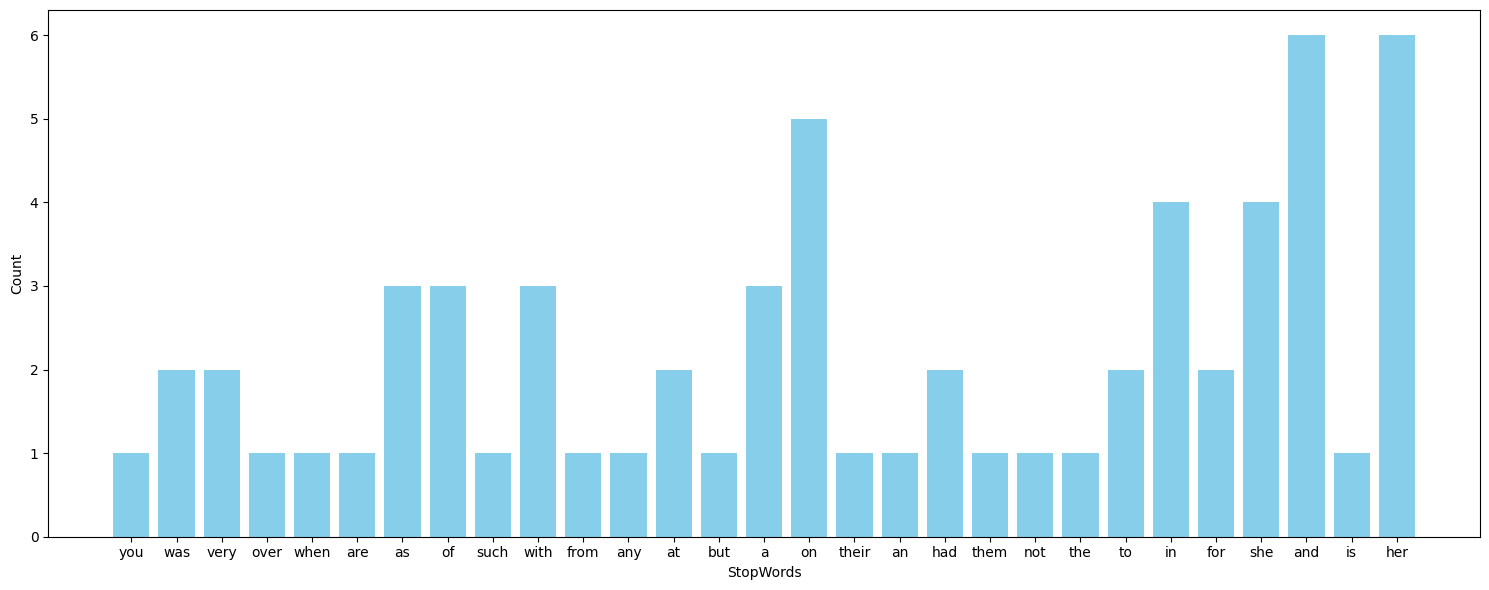

In [155]:
stop_words =[]
for word in clean_text.split(" "):
  if word in stopwords.words('english'):
    stop_words.append(word)
unique_stop_words =list(set(stop_words))
counts = [stop_words.count(value) for value in unique_stop_words]
plt.figure(figsize=(15,6))
plt.bar(unique_stop_words,counts,color="skyblue")
plt.xlabel("StopWords")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**d. Remove the stopwords from the text.**

Removing stopwords can help in focusing on the most meaningful words in the text.

Possible Applications:
*   Improving the performance of text analysis tasks such as topic modeling or text summarization.
*   Reducing noise in text data for better visualization or interpretation.



In [156]:
wordtoken = word_tokenize(clean_text)
sentence = []
detokenizer = TreebankWordDetokenizer()
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in wordtoken if word.lower() not in stop_words]
texts = detokenizer.detokenize(filtered_tokens)
print(texts)

balmy evening May Sarah Smith born September 10 1995 sat typing furiously computer avid enthusiast natural language processing NLP reveled dissecting linguistic complexities Amidst analysis Sarah grappled intricacies stop words deciphering impact sentiment analysis email sarahsmithexamplecom provided gateway collaboration among fellow NLP aficionados fostering discussions tokenization stemming techniques got viral X platform January 22 2010 tweets garnered 100032424291 likes overwhelmed get offline June 23 2014 upto May 2 2017 Despite occasional setbacks Sarahs determination soared meticulously finetuned algorithms twitter account SarahS flooded hashtags NLPQueen BringingNLPtojustics enhance data preprocessing phone number 91 8371031783 91 643986 served conduit inquiries invitations NLP conferences worldwide propelling towards new frontiers language understanding artificial intelligence like person set haters didnt let affect good decisionmaking comes handy working textual data


**e. Plot the distribution of each POS Tag using a barplot.**

Visualizing the distribution of POS tags provides insights into the grammatical structure and syntactic patterns of the text.

Possible Applications:
*   Understanding the syntactic complexity of the text.
*   Analyzing differences in writing styles or genres based on POS tag distributions.

In [157]:
wordtoken = word_tokenize(texts)
nltk.download('averaged_perceptron_tagger')
pos_tags =[]
pos_tags = pos_tag(wordtoken)
print("\nPoS Tagging Result:")
for word, pos_tag in pos_tags:
    print(f"{word}: {pos_tag}")


PoS Tagging Result:
balmy: IN
evening: VBG
May: NNP
Sarah: NNP
Smith: NNP
born: JJ
September: NNP
10: CD
1995: CD
sat: VBD
typing: VBG
furiously: RB
computer: NN
avid: NN
enthusiast: JJ
natural: JJ
language: NN
processing: NN
NLP: NNP
reveled: VBD
dissecting: VBG
linguistic: JJ
complexities: NNS
Amidst: NNP
analysis: NN
Sarah: NNP
grappled: VBD
intricacies: NNS
stop: VB
words: NNS
deciphering: VBG
impact: JJ
sentiment: NN
analysis: NN
email: NN
sarahsmithexamplecom: NN
provided: VBD
gateway: JJ
collaboration: NN
among: IN
fellow: JJ
NLP: NNP
aficionados: NN
fostering: VBG
discussions: NNS
tokenization: NN
stemming: VBG
techniques: NNS
got: VBD
viral: JJ
X: NNP
platform: NN
January: NNP
22: CD
2010: CD
tweets: NNS
garnered: VBD
100032424291: CD
likes: NNS
overwhelmed: VBD
get: VB
offline: JJ
June: NNP
23: CD
2014: CD
upto: NN
May: NNP
2: CD
2017: CD
Despite: IN
occasional: JJ
setbacks: NNS
Sarahs: NNP
determination: NN
soared: VBD
meticulously: RB
finetuned: VBN
algorithms: RP
twitter:

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


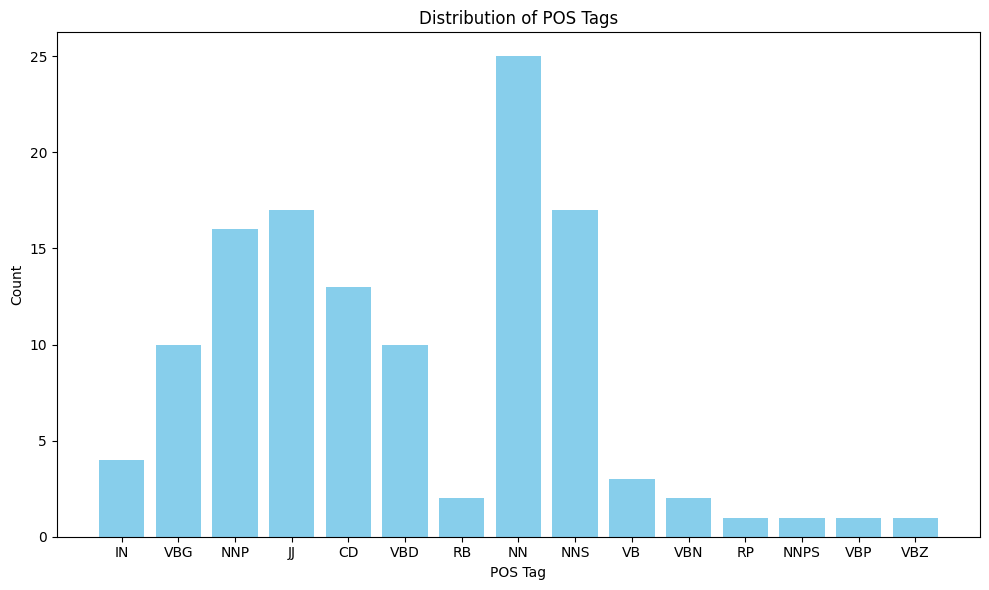

In [158]:
pos_counts = {}
for token, pos_tag in pos_tags:
    if pos_tag in pos_counts:
        pos_counts[pos_tag] += 1
    else:
        pos_counts[pos_tag] = 1

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
plt.title('Distribution of POS Tags')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**f. Determine the number of unique lemma available in the text.**

Identifying unique lemmas helps in understanding the semantic richness and variety of the text.

Possible Applications:
*   Analyzing semantic similarities or differences between texts.
*   Enhancing text search or retrieval by normalizing variations of words.



In [159]:
wordnet_lemmatizer = WordNetLemmatizer()
lemma_words = [wordnet_lemmatizer.lemmatize(word) for word in wordtoken]
unique_lemma = set(lemma_words)
print("Total Number of Lemma in the text",len(lemma_words))
print("Number of Unique Lemma Available in the text",len(unique_lemma))

Total Number of Lemma in the text 123
Number of Unique Lemma Available in the text 114


**g. Plot the frequency distribution of words in the text. Display only the top 10(most occurring) tokens in the chart**

Visualizing the frequency distribution of words highlights the most common terms in the text.

Possible Applications:
*   Identifying key themes or topics in the text.
*   Understanding the emphasis or focus of the text.



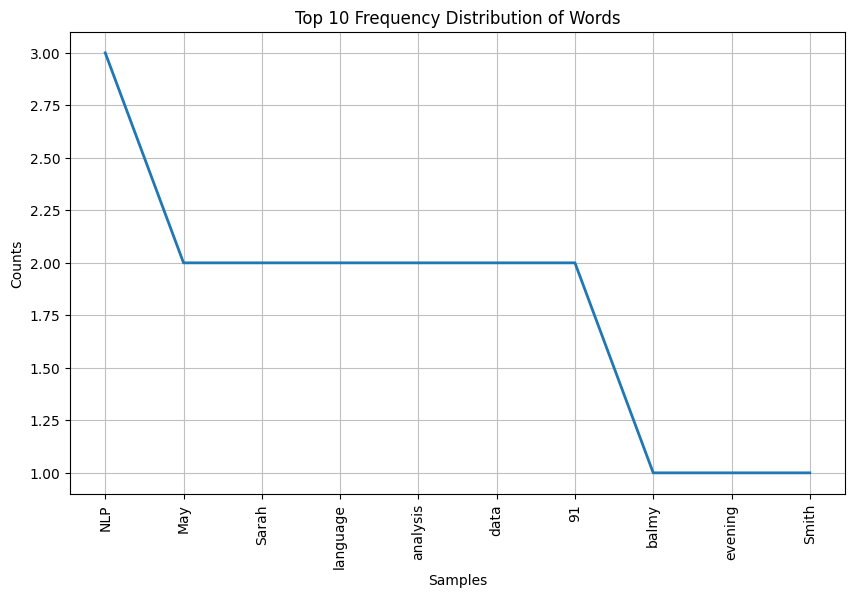

In [160]:
freq_dist = FreqDist(wordtoken)

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Top 10 Frequency Distribution of Words')
freq_dist.plot(10, cumulative=False)
plt.show()

**h. Find the number of unique bigrams, trigrams and quadgrams (n=4) in the corpus**

Identifying unique n-grams provides insights into collocations and recurring phrases in the text.

Possible Applications:
*   Extracting meaningful phrases for text summarization or keyword extraction
*   Analyzing patterns or associations between words in the text.



In [161]:
bigrams = list(ngrams(filtered_tokens, 2))
trigrams = list(ngrams(filtered_tokens, 3))
quadgrams = list(ngrams(filtered_tokens, 4))

# Count unique bigrams, trigrams, and quadgrams
unique_bigrams = len(set(bigrams))
unique_trigrams = len(set(trigrams))
unique_quadgrams = len(set(quadgrams))

print("Number of unique bigrams:", unique_bigrams)
print("Number of unique trigrams:", unique_trigrams)
print("Number of unique quadgrams:", unique_quadgrams)

Number of unique bigrams: 122
Number of unique trigrams: 121
Number of unique quadgrams: 120


**i. Find all dates and convert them to the DD-MM-YYYY format.**

Extracting and standardizing dates enhances the text's consistency and facilitates temporal analysis.

Possible Applications:
*   Temporal analysis of events or trends mentioned in the text.
*   Normalizing date formats for downstream analysis or visualization.



In [162]:
matches = datefinder.find_dates(texts)
# Converting dates to DD-MM-YYYY Format
original = []
formatted = []
for match in matches:
  original.append(match)
  formatted_date = match.strftime('%d-%m-%Y')
  formatted.append(formatted_date)

print("Original dates found:", original)
print("Formatted dates:", formatted)

Original dates found: [datetime.datetime(2024, 5, 16, 0, 0), datetime.datetime(1995, 9, 10, 0, 0), datetime.datetime(2010, 1, 22, 0, 0), datetime.datetime(2014, 6, 23, 0, 0), datetime.datetime(2017, 5, 2, 0, 0)]
Formatted dates: ['16-05-2024', '10-09-1995', '22-01-2010', '23-06-2014', '02-05-2017']


**j. Plot a distribution of the different values of year occurring in the text.**

Visualizing the distribution of years provides insights into temporal patterns or trends in the text.

Possible Applications:
*   Analyzing historical contexts or temporal changes in language usage.
*   Identifying key time periods or epochs referenced in the text.



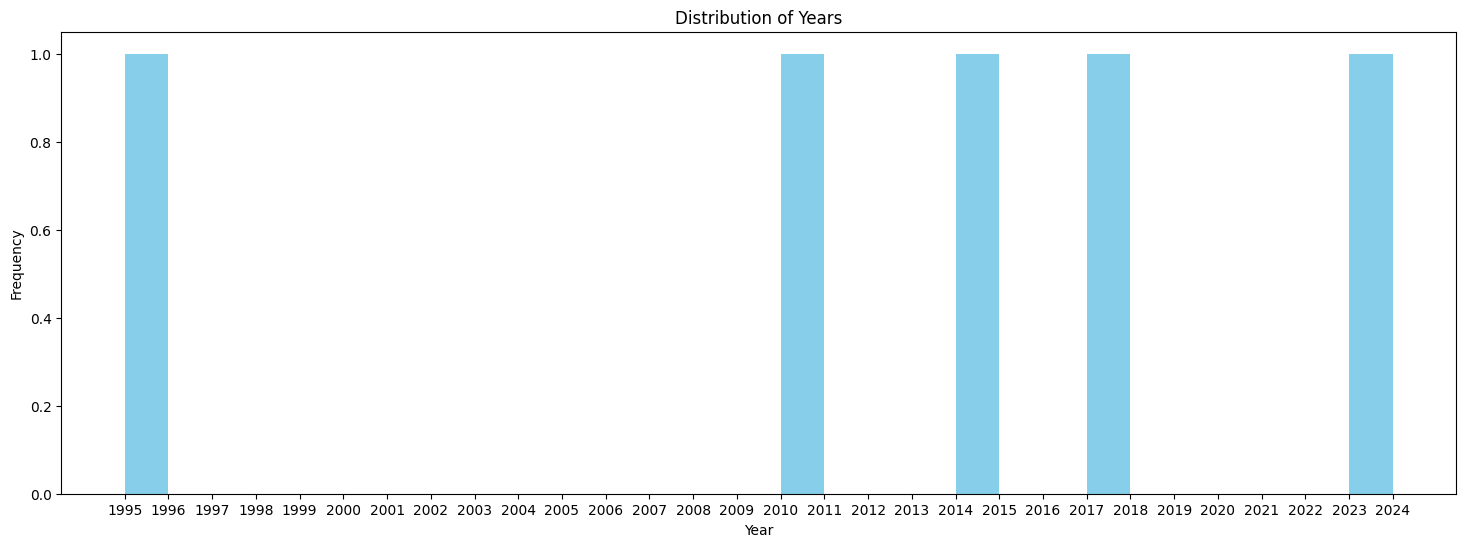

In [163]:
year = [datetime.datetime.strptime(date_string, "%d-%m-%Y").year for date_string in formatted]
plt.figure(figsize=(18, 6))
plt.hist(year, bins=range(min(year), max(year) + 1), color='skyblue')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.xticks(range(min(year), max(year) + 1))
plt.show()

**k. Determine whether the text contains any phone numbers in it. Ensure the phone numbers are valid if any. If an invalid phone number is found, remove it from the text.**

Identifying and validating phone numbers ensures data integrity and privacy compliance.

Possible Applications:
*   Extracting contact information for further communication or analysis.
*   Ensuring text data quality by removing invalid or irrelevant information.



In [198]:
import phonenumbers

for match in phonenumbers.PhoneNumberMatcher(texts, "IN"):
    print(match)

PhoneNumberMatch [736,746) 8371031783


In [203]:
# Regular expression to find phone numbers
phone_pattern = r'\+\d{2}\s\d{6}'

# Find all phone numbers in the text
phone_numbers = re.findall(phone_pattern, text)

# Iterate through each phone number, parse and validate it
for number in phone_numbers:
        parsed_number = phonenumbers.parse(number, 'IN')
        if not phonenumbers.is_valid_number(parsed_number):
            textb = text.replace(number, '')  # Replace invalid phone number with empty string

# Print the modified text
print("Text with valid phone numbers and specific phone number retained:")
print(textb)

Text with valid phone numbers and specific phone number retained:
On a balmy evening in May, Sarah Smith, born on September 10, 1995, sat typing furiously at her computer. 
As an avid enthusiast of natural language processing (NLP), she reveled in dissecting linguistic complexities. 
Amidst her analysis, Sarah grappled with the intricacies of stop words, deciphering their impact on sentiment analysis. 
Her email, sarah.smith@example.com, provided a gateway for collaboration among fellow NLP aficionados, fostering discussions on tokenization and stemming techniques. 
She got viral on X platform on January 22, 2010. Her tweets garnered over 100032424291 likes. She was very overwhelmed and had to get offline from June 23, 2014 and upto May 2, 2017.
Despite occasional setbacks, Sarah's determination soared as she meticulously fine-tuned her algorithms. Her twitter account @SarahS was flooded with hashtags such as #NLPQueen #BringingNLPtojustics 
to enhance data preprocessing. Her phone num